In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge


In [2]:
dt = pd.read_csv('../data/nam_processed_data.csv')
print(dt.head())

   bhk  area  status  price_in_USD  house_type  new  region_Agripada  \
0    2   650       1      314400.0           0    0             True   
1    1   803       0      270000.0           0    0             True   
2    1   684       0      204000.0           0    0             True   
3    1   545       0      192000.0           0    0             True   
4    2  1650       0      420000.0           0    0             True   

   region_Airoli  region_Ambernath East  region_Ambernath West  ...  \
0          False                  False                  False  ...   
1          False                  False                  False  ...   
2          False                  False                  False  ...   
3          False                  False                  False  ...   
4          False                  False                  False  ...   

   region_Vangani  region_Vasai  region_Vashi  region_Vikhroli  \
0           False         False         False            False   
1       

In [3]:
print(dt.shape)

(45343, 115)


In [4]:
print(dt.head())

   bhk  area  status  price_in_USD  house_type  new  region_Agripada  \
0    2   650       1      314400.0           0    0             True   
1    1   803       0      270000.0           0    0             True   
2    1   684       0      204000.0           0    0             True   
3    1   545       0      192000.0           0    0             True   
4    2  1650       0      420000.0           0    0             True   

   region_Airoli  region_Ambernath East  region_Ambernath West  ...  \
0          False                  False                  False  ...   
1          False                  False                  False  ...   
2          False                  False                  False  ...   
3          False                  False                  False  ...   
4          False                  False                  False  ...   

   region_Vangani  region_Vasai  region_Vashi  region_Vikhroli  \
0           False         False         False            False   
1       

In [5]:
X = dt.drop(['price_in_USD'], axis = 1)
Y = dt.price_in_USD


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X , Y ,test_size = 0.2, random_state=10)
X_k, X_val, Y_k, Y_val = train_test_split(X, Y, test_size=0.3, random_state=10)

In [7]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [21]:
# Define the Ridge model
ridge = Ridge()

# Set up the parameter grid for alpha
param_grid = {'alpha': np.logspace(-6, 6, 70)}

# Perform grid search with cross-validation
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train_scaled, Y_train)

# Get the best alpha
best_alpha = ridge_cv.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

Best alpha: 44.89251258218608


In [20]:
from sklearn.model_selection import learning_curve
# Train the Ridge model with the best alpha
# ridge_best = Ridge(alpha=best_alpha)
ridge_best = Ridge(alpha=10.00)
ridge_best.fit(X_train_scaled, Y_train)

# Evaluate the model on the test set
score_test = ridge_best.score(X_test_scaled, Y_test)
print("R-squared on the test set:", score_test)

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    ridge_best, X_train_scaled, Y_train, cv=4, train_sizes=np.linspace(0.1, 1.0, 10), scoring="r2"
)

R-squared on the test set: 0.8676298210977483


In [11]:
# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)


In [12]:
# Print the training scores and cross-validation scores
print("Training scores:\n", train_scores)
print("Cross-validation scores:\n", val_scores)

# Print the mean and standard deviation of training and cross-validation scores
print("Mean training scores:\n", train_scores_mean)
print("Mean cross-validation scores:\n", val_scores_mean)

Training scores:
 [[0.88013531 0.87841695 0.87841695 0.87841695]
 [0.88662266 0.87133917 0.87133917 0.87133917]
 [0.87593902 0.87973057 0.87973057 0.87973057]
 [0.8638844  0.87076787 0.87483122 0.87483122]
 [0.86196036 0.86881604 0.87595499 0.87595499]
 [0.85328312 0.85975775 0.8739594  0.8739594 ]
 [0.85033697 0.85620447 0.86565019 0.86907219]
 [0.85134892 0.85563549 0.86521112 0.86908991]
 [0.85455957 0.8580017  0.86696002 0.86160901]
 [0.85241916 0.85521996 0.86234427 0.86070001]]
Cross-validation scores:
 [[0.82684926 0.8543391  0.80927664 0.82071902]
 [0.83545834 0.86474898 0.83213351 0.83459987]
 [0.84371812 0.86653971 0.83016036 0.83470551]
 [0.87082777 0.85716389 0.83235584 0.82681118]
 [0.87148102 0.85561504 0.8312652  0.82670796]
 [0.87073394 0.85518529 0.83301367 0.83065782]
 [0.86853164 0.85157918 0.8366495  0.8331611 ]
 [0.86754304 0.85633521 0.83541044 0.83445377]
 [0.8677293  0.857691   0.83517492 0.84026175]
 [0.86512932 0.85669057 0.83646665 0.83781412]]
Mean training 

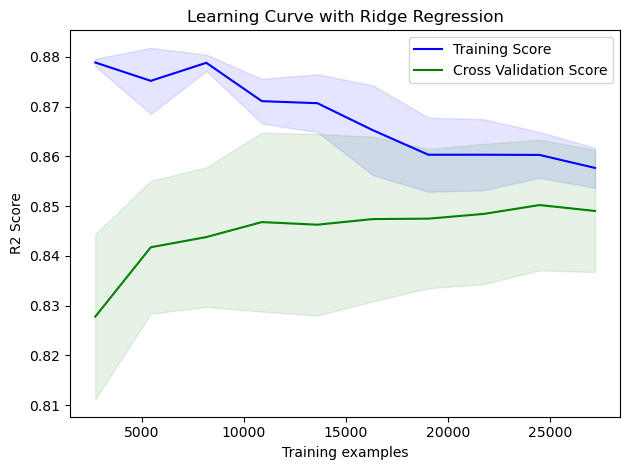

In [13]:
# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label="Training Score", color='b')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='b', alpha=0.1)
plt.plot(train_sizes, val_scores_mean, label="Cross Validation Score", color='g')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color='g', alpha=0.1)

# Adding titles and labels
plt.title("Learning Curve with Ridge Regression")
plt.xlabel("Training examples")
plt.ylabel("R2 Score")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [14]:
# Evaluate the model on the validation set
score_val = ridge_best.score(X_val_scaled, Y_val)
print("R-squared on the validation set:", score_val)

# Make predictions
Y_pred = ridge_best.predict(X_test_scaled)


R-squared on the validation set: 0.8653163902111856


       actual value      predicted     difference
24961      105912.0  175105.658295  -69193.658295
40922       75588.0   45148.965263   30439.034737
12323       40800.0    9791.431825   31008.568175
5755       442800.0  570405.909128 -127605.909128
15411      388800.0  543764.776562 -154964.776562
...             ...            ...            ...
9629       264000.0  301322.680914  -37322.680914
7325       102000.0  100500.377653    1499.622347
1218       178800.0  136947.526539   41852.473461
31936      103200.0  129165.094783  -25965.094783
3093       420000.0  468865.446115  -48865.446115

[9069 rows x 3 columns]


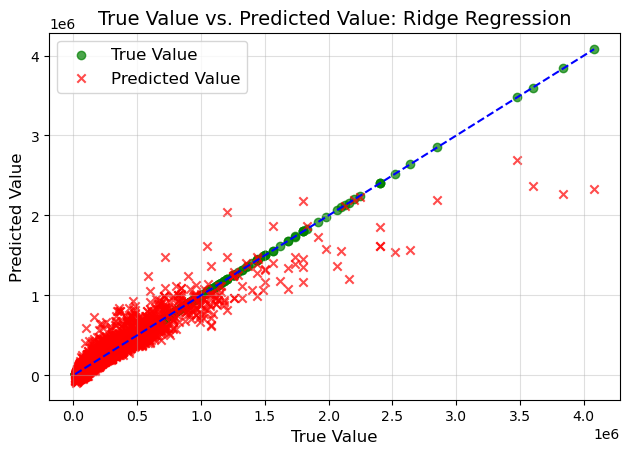

In [15]:
# Create a DataFrame to compare actual and predicted values
pred_table = pd.DataFrame(data={"actual value": Y_test, "predicted": Y_pred})
pred_table["difference"] = pred_table["actual value"] - pred_table["predicted"]
print(pred_table)

# Scatter plot for true vs predicted values
plt.scatter(Y_test, Y_test, c='green', marker='o', label='True Value', alpha=0.7)
plt.scatter(Y_test, Y_pred, c='red', marker='x', label='Predicted Value', alpha=0.7)
plt.xlabel("True Value", fontsize=12)
plt.ylabel("Predicted Value", fontsize=12)
plt.title("True Value vs. Predicted Value: Ridge Regression", fontsize=14)
plt.legend(fontsize=12)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='blue')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

Best Alpha: 0.001
R^2 Score: 0.8676008637184099
MAE: 42297.95981342651
MSE: 5516695525.458917

Ridge Regression with best alpha: 0.001
R^2 Score: 0.8676008637184099
MAE: 42297.95981342651
MSE: 5516695525.458917


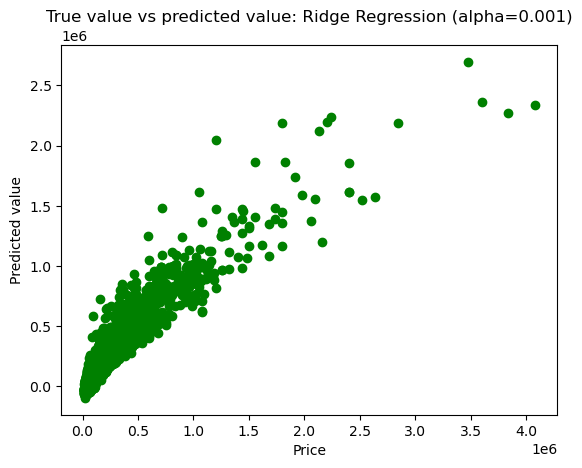

In [7]:
from sklearn.model_selection import KFold
# Feature Scaling (using StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Ridge Regression model
ridge = Ridge()

# Define the parameter grid for GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 100)}
cv = KFold(n_splits=5, shuffle=True, random_state=10)  # Use KFold for regression

# Perform GridSearchCV with pre-fit for early stopping (indirect)
grid_search = GridSearchCV(ridge, param_grid, cv=cv, scoring='neg_mean_squared_error', refit=False)
grid_search.fit(X_train_scaled, Y_train)

# Get best parameters from grid search
best_params = grid_search.best_params_
best_alpha = grid_search.best_params_['alpha']

# Re-initialize Ridge with best parameters and fit on entire training set
ridge_best = Ridge(**best_params)
ridge_best.fit(X_train_scaled, Y_train)

# Predict on the test set
Y_pred_ridge = ridge_best.predict(X_test_scaled)

# Evaluate performance
r2 = r2_score(Y_test, Y_pred_ridge)
mae = mean_absolute_error(Y_test, Y_pred_ridge)
mse = mean_squared_error(Y_test, Y_pred_ridge)

# Print results
print("Best Alpha:", best_alpha)
print("R^2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)

# Print the best alpha again
print(f"\nRidge Regression with best alpha: {best_alpha}")

# Evaluate performance on test set
print(f"R^2 Score: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

# Plot predicted vs actual values
plt.scatter(Y_test, Y_pred_ridge, c='green')
plt.xlabel("Price")
plt.ylabel("Predicted value")
plt.title(f"True value vs predicted value: Ridge Regression (alpha={best_alpha})")
plt.show()

In [33]:
# from sklearn.linear_model import RidgeCV
# # Initialize variables
# n_alphas = 200
# alphas = 1 / np.logspace(1, -2, n_alphas)
# coefs = []
# # Initialize RidgeCV with a range of alphas
# ridge_cv = RidgeCV(alphas=alphas, cv=5)
# ridge_cv.fit(X_train, Y_train)

# # Get the best alpha
# best_alpha = ridge_cv.alpha_

# # Initialize Ridge Regression with the best alpha
# ridge_best = Ridge(alpha=best_alpha)
# ridge_best.fit(X_train, Y_train)

# # Get the coefficients and corresponding feature names
# feature_coefficients = pd.Series(ridge_best.coef_, index=X.columns)
# selected_features_ridge = feature_coefficients[abs(feature_coefficients) > 0.01].index.tolist()  # Adjust the threshold as needed

# # Print the selected features
# print("Selected Features by Ridge Regression:")
# for feature in selected_features_ridge:
#     print(feature)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define a wider range of alpha values to search
alphas = np.logspace(-3, 3, 100)

# Create a Ridge Regression model
ridge = Ridge()

# Define the parameter grid for GridSearchCV
param_grid = {'alpha': alphas}

# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='mean_squared_error')
grid_search.fit(X_train, Y_train)

# Get the best alpha and corresponding mean squared error
best_alpha = grid_search.best_params_['alpha']
best_mse = -grid_search.best_score_  # Take negative of mean squared error because GridSearchCV uses neg_mean_squared_error

# Initialize Ridge Regression with the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, Y_train)

# Predict on the test set
Y_pred_ridge = ridge_best.predict(X_test)

# Evaluate performance
r2 = r2_score(Y_test, Y_pred_ridge)
mae = mean_absolute_error(Y_test, Y_pred_ridge) 
mse = mean_squared_error(Y_test, Y_pred_ridge)

# Print results
print("Best Alpha:", best_alpha)
print("Best MSE (Cross-Validation):", best_mse)
print("R^2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)


Best Alpha: 0.9326033468832199
Best MSE (Cross-Validation): 6356607095.664678
R^2 Score: 0.8683751568307873
MAE: 42330.91786345691
MSE: 5484432933.2063465


In [32]:
print(best_alpha)

0.8026433522257174


In [29]:
# ridge_best = Ridge(alpha=best_alpha)
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, Y_train)
Y_pred_ridge = ridge_best.predict(X_test)

In [30]:
# Evaluate performance
r2 = r2_score(Y_test, Y_pred_ridge)
mae = mean_absolute_error(Y_test, Y_pred_ridge)
mse = mean_squared_error(Y_test, Y_pred_ridge)

# print(f"Ridge Regression with alpha={best_alpha}")
print(f"Ridge Regression with alpha={best_alpha}")
print(f"R^2 Score: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")


Ridge Regression with alpha=0.8026433522257174
R^2 Score: 0.8683103447602123
MAE: 42325.1349699358
MSE: 5487133467.890925


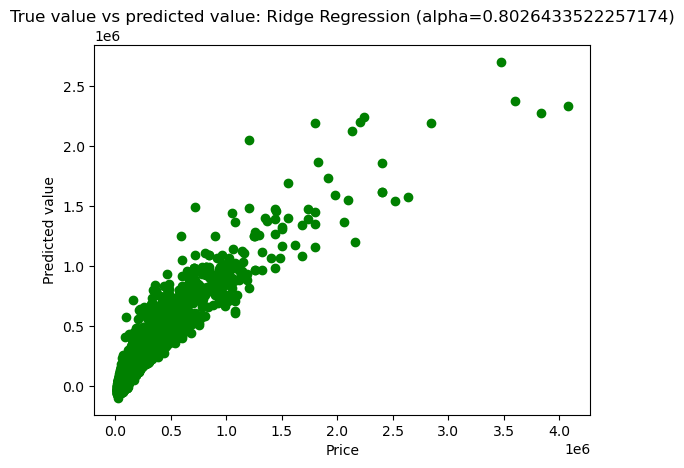

In [16]:
# Plotting predictions
plt.scatter(Y_test, Y_pred_ridge, c='green')
plt.xlabel("Price")
plt.ylabel("Predicted value")
plt.title(f"True value vs predicted value: Ridge Regression (alpha={best_alpha})")
plt.show()